In [1]:
import networkx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
%matplotlib inline

In [2]:
path = '../data/temp/rehydration'
hashtag_path = '../data/temp/hashtags'

In [3]:
if not os.path.exists(hashtag_path):
        os.makedirs(hashtag_path)

In [4]:
jsons = [os.path.join(path, name) for name in sorted(os.listdir(path)) if 'dataset' in name]

# Get top 50 Hashtags

In [5]:
def hashtag_counts(json):
    df = pd.read_json(json, lines = True)
    ht = df['entities'].apply(lambda e: [x['text'] for x in e['hashtags']])
    return pd.Series(ht.sum()).value_counts()

In [11]:
def user_counts(json):
    df = pd.read_json(json, lines=True)
    us = df['user'].apply(lambda x: x['screen_name'])
    return us.value_counts()

In [20]:
def count_features(jsons, top_k = 100, mode = 'hashtag'):
    if mode == 'hashtag':
        method = hashtag_counts
    elif mode == 'user':
        method = user_counts
    # every json is a path to a jsonl file
    total_series = method(jsons[0])
    print(f'vc shape {total_series.shape}', end='\r')
    for json in jsons[1:]:
        vc_series = method(json)
        total_series = total_series.add(vc_series, fill_value = 0)
        print(f'vc shape {total_series.shape}', end='\r')
    if top_k is None:
        return total_series.sort_values().sort_values(ascending=False)
    return total_series.sort_values(ascending=False).iloc[:top_k]

In [21]:
total = count_features(jsons, top_k = 200, mode='user')
# total = pd.read_csv('temporary.csv', header = None)
total = total.set_index(0)[1]

AttributeError: 'Series' object has no attribute 'set_index'

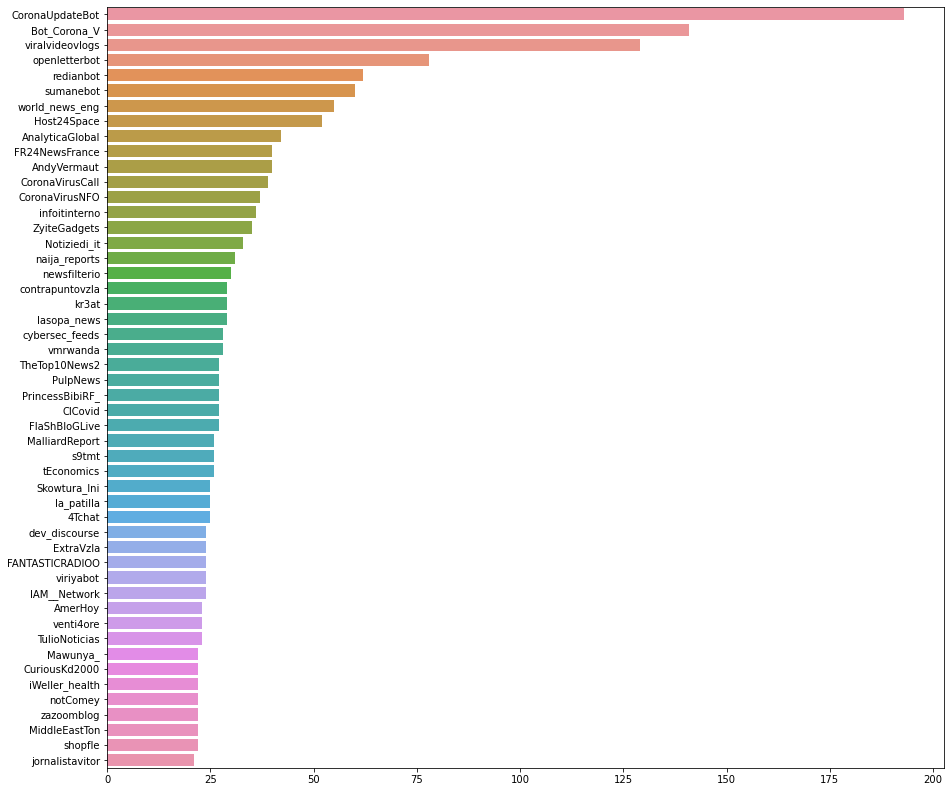

In [23]:
plt.figure(figsize = (15, 14))
sns.barplot(y = total.iloc[:50].index, x = total.iloc[:50].values)

Most of the hashtags are variation of the term COVID or region

In [12]:
total.iloc[:10]

COVID19        97196.0
coronavirus    39595.0
Covid19        14663.0
Coronavirus    14518.0
covid19        10751.0
Covid_19        3709.0
COVIDー19        3243.0
CoronaVirus     2852.0
COVID           1923.0
China           1797.0
dtype: float64

In [15]:
total.iloc[100:150]

FoxNews                276.0
Pandemic               271.0
Health                 269.0
HongKong               269.0
Blood                  262.0
CoronaUpdate           256.0
masques                256.0
quarantine             253.0
AI                     252.0
YoMeQuedoEnCasa        252.0
緊急事態宣言                 245.0
Italy                  245.0
Italia                 243.0
BreakingNews           243.0
Texas                  241.0
mentalhealth           240.0
WWG1WGA                235.0
COVID19India           233.0
Quarantine             231.0
Chile                  231.0
BorisJohnson           231.0
TogetherAtHome         227.0
Colombia               227.0
cdnpoli                226.0
chloroquine            226.0
socialdistancing       225.0
Brazil                 225.0
Odisha                 223.0
Israel                 221.0
coronavírus            220.0
Conte                  220.0
NuevaNormalidad        217.0
hydroxychloroquine     216.0
WATCH                  214.0
ULTIMAHORA    

In [11]:
total.to_csv('temporary.csv',header=None)

# Get user posts

In [19]:
df_ref = pd.read_json(jsons[0], lines=True)

In [20]:
df_ref.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'quoted_status', 'withheld_in_countries'],
      dtype='object')

In [26]:
df_ref.loc[1]

created_at                                           2020-03-22 04:01:36+00:00
id                                                         1241575732926730241
id_str                                                     1241575732926730240
full_text                    RT @SenMikeLee: OVER MY DEAD BODY https://t.co...
truncated                                                                False
display_text_range                                                     [0, 57]
entities                     {'hashtags': [], 'symbols': [], 'user_mentions...
extended_entities                                                          NaN
source                       <a href="http://twitter.com/download/android" ...
in_reply_to_status_id                                                      NaN
in_reply_to_status_id_str                                                  NaN
in_reply_to_user_id                                                        NaN
in_reply_to_user_id_str                             

In [56]:
total_user = count_features(jsons, top_k = None, mode = 'user')

first vc shape (9470,)
vc shape (18905,)
vc shape (28451,)
vc shape (32799,)
vc shape (41106,)
vc shape (49398,)
vc shape (56787,)
vc shape (63979,)
vc shape (72122,)
vc shape (79070,)
vc shape (86957,)
vc shape (94330,)
vc shape (99940,)
vc shape (107402,)
vc shape (115444,)
vc shape (122741,)
vc shape (130557,)
vc shape (138365,)
vc shape (145848,)
vc shape (153969,)
vc shape (161281,)
vc shape (168373,)
vc shape (175720,)
vc shape (183368,)
vc shape (190592,)
vc shape (197855,)
vc shape (204538,)
vc shape (210944,)
vc shape (217372,)
vc shape (224769,)
vc shape (231530,)
vc shape (238281,)
vc shape (245276,)
vc shape (251720,)
vc shape (258178,)
vc shape (264749,)
vc shape (271472,)
vc shape (278514,)
vc shape (284632,)
vc shape (291422,)
vc shape (296212,)
vc shape (302349,)
vc shape (309286,)
vc shape (316468,)
vc shape (323459,)
vc shape (330367,)
vc shape (337350,)
vc shape (344201,)
vc shape (349945,)
vc shape (356266,)
vc shape (356835,)
vc shape (362282,)
vc shape (367687,)
v

In [91]:
total_user = total_user.rename('posts per user')

In [92]:
(total_user > 10).mean()

0.002412861026426696

In [93]:
(total_user < 10).mean()

0.9968198207957412

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'density of number of posts per user')

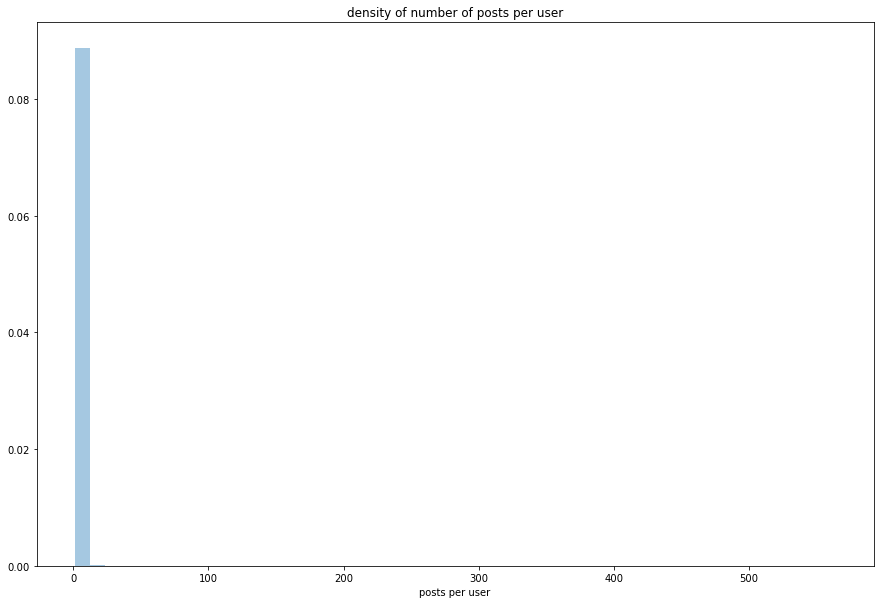

In [103]:
plt.figure(figsize = (15, 10))
sns.distplot(total_user)
plt.title('density of number of posts per user')

In [1]:
plt.figure(figsize = (15, 10))
sns.distplot(total_user.loc[total_user < 10])
plt.title('density of number of posts per user (ZOOMED)')

NameError: name 'plt' is not defined

# Count of hashtag per time

In [16]:
def count_over_time(jsons, good_tags, bad_tags):
    good = []
    bad = []
    for json in jsons:
        vc = hashtag_counts(json)
        good.append(vc.reindex(good_tags).fillna(0))
        bad.append(vc.reindex(bad_tags).fillna(0))
    return good, bad

In [31]:
good_tags, bad_tags = ['SocialDistancing', 'StayHome', "WearAMask"], ['WuhanVirus','Hydroxychloroquine', 'MAGA']

In [32]:
result = count_over_time(jsons, good_tags, bad_tags)

In [33]:
good, bad = result

In [20]:
date = [d.strftime('%m%d') for d in pd.date_range('2020-3-22', '2020-7-31')]

In [39]:
def plot_tags(tags, data):
    plt.figure(figsize = (15, 10))
    for tag in tags:
        plt.plot([x[tag] for x in data], label = tag)
    plt.legend()

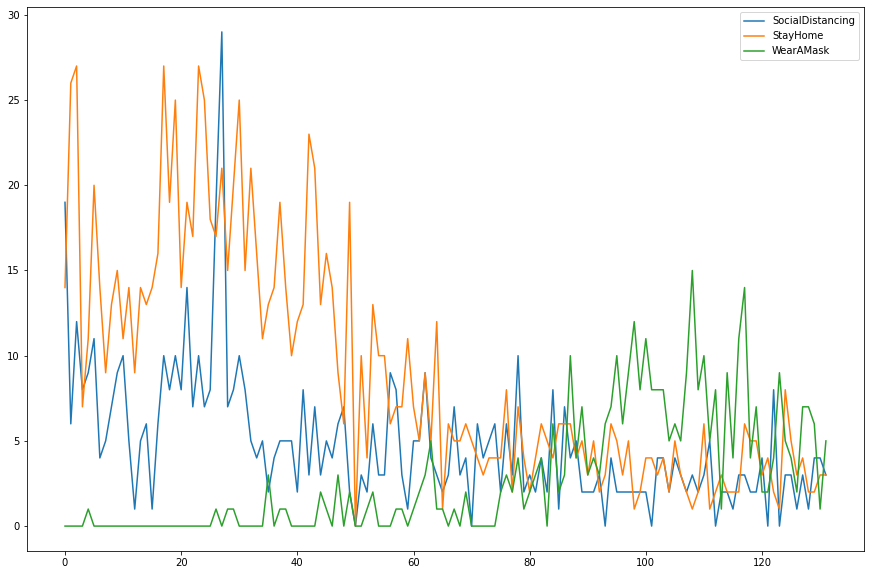

In [40]:
plot_tags(good_tags, good)

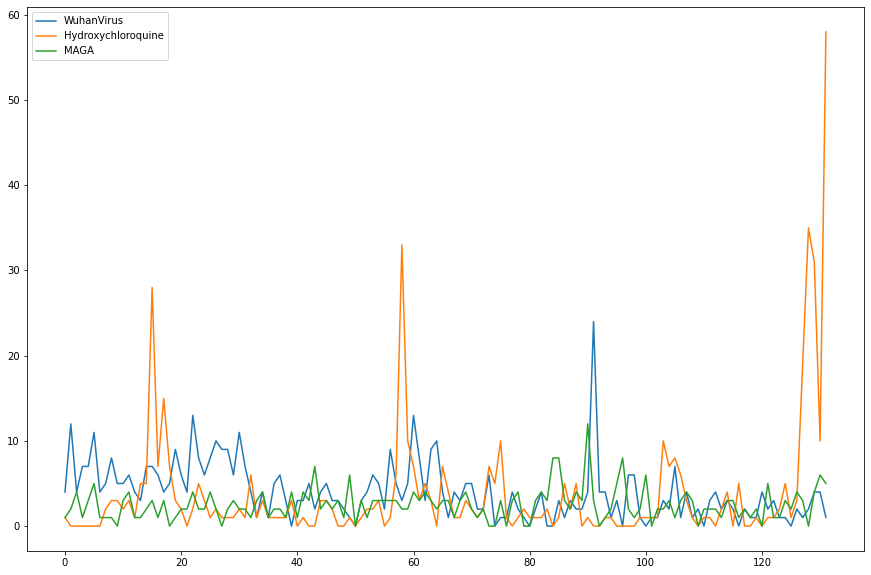

In [41]:
plot_tags(bad_tags, bad)